In [1]:
import os
os.chdir("..")
print(os.getcwd())

/Users/rosinatorres/Documents/PhD/Project/Code/MS2LDA/MS2LDA


In [2]:
import joblib
import os

folder_path = "test_data"
#Load the motifs from MS2LDA Run_Template as a list
lda_model = joblib.load(os.path.join(folder_path, 'motifs.pkl'))

motifs_spectra = joblib.load(os.path.join(folder_path, 'motifs_spectra.pkl'))

corpus = joblib.load(os.path.join(folder_path, 'corpus.pkl'))

In [21]:
import pickle as pkl

with open(os.path.join(folder_path, 'motifs.pkl'), 'rb') as file:
    model = pkl.load(file)

print(model)


[[('frag@124.98', 0.01685032621026039), ('frag@96.95', 0.01685032621026039), ('frag@77.04', 0.014745350927114487), ('frag@142.99', 0.013692863285541534), ('frag@64.98', 0.010535400360822678), ('frag@114.96', 0.009482912719249725), ('frag@72.04', 0.009482912719249725), ('frag@51.02', 0.009482912719249725), ('frag@88.02', 0.008430425077676773), ('frag@78.94', 0.007377937901765108), ('frag@142.94', 0.007377937901765108), ('frag@49.01', 0.006325450260192156), ('frag@169.08', 0.006325450260192156), ('loss@105.02', 0.006325450260192156), ('frag@220.95', 0.006325450260192156), ('frag@107.05', 0.006325450260192156), ('frag@91.05', 0.006325450260192156), ('loss@57.02', 0.005272963084280491), ('frag@127.02', 0.005272963084280491), ('frag@109.01', 0.005272963084280491)], [('frag@124.98', 0.021007269620895386), ('frag@96.95', 0.018007658421993256), ('frag@77.04', 0.01300830952823162), ('frag@127.02', 0.01300830952823162), ('frag@114.96', 0.011008569039404392), ('frag@142.99', 0.009008829481899738)

In [20]:
import tmplot as tmp
phi = tmp.get_phi(model)
phi.head()

/Users/rosinatorres/anaconda3/envs/MS2LDA_v2/lib/python3.11/site-packages/tmplot/_helpers.py:39: UserWarning: Please install "bitermplus" package to analyze its models.
Run `pip install bitermplus` in the console.
  warn(


AttributeError: 'NoneType' object has no attribute 'head'

In [22]:
topics_coords = tmp.prepare_coords(model)
topics_coords.head()

/Users/rosinatorres/anaconda3/envs/MS2LDA_v2/lib/python3.11/site-packages/tmplot/_helpers.py:39: UserWarning: Please install "bitermplus" package to analyze its models.
Run `pip install bitermplus` in the console.
  warn(


IndexError: tuple index out of range

(<Figure size 1600x1200 with 1 Axes>,
 <Axes: title={'center': 'Spectrum'}, xlabel='m/z', ylabel='Intensity'>)

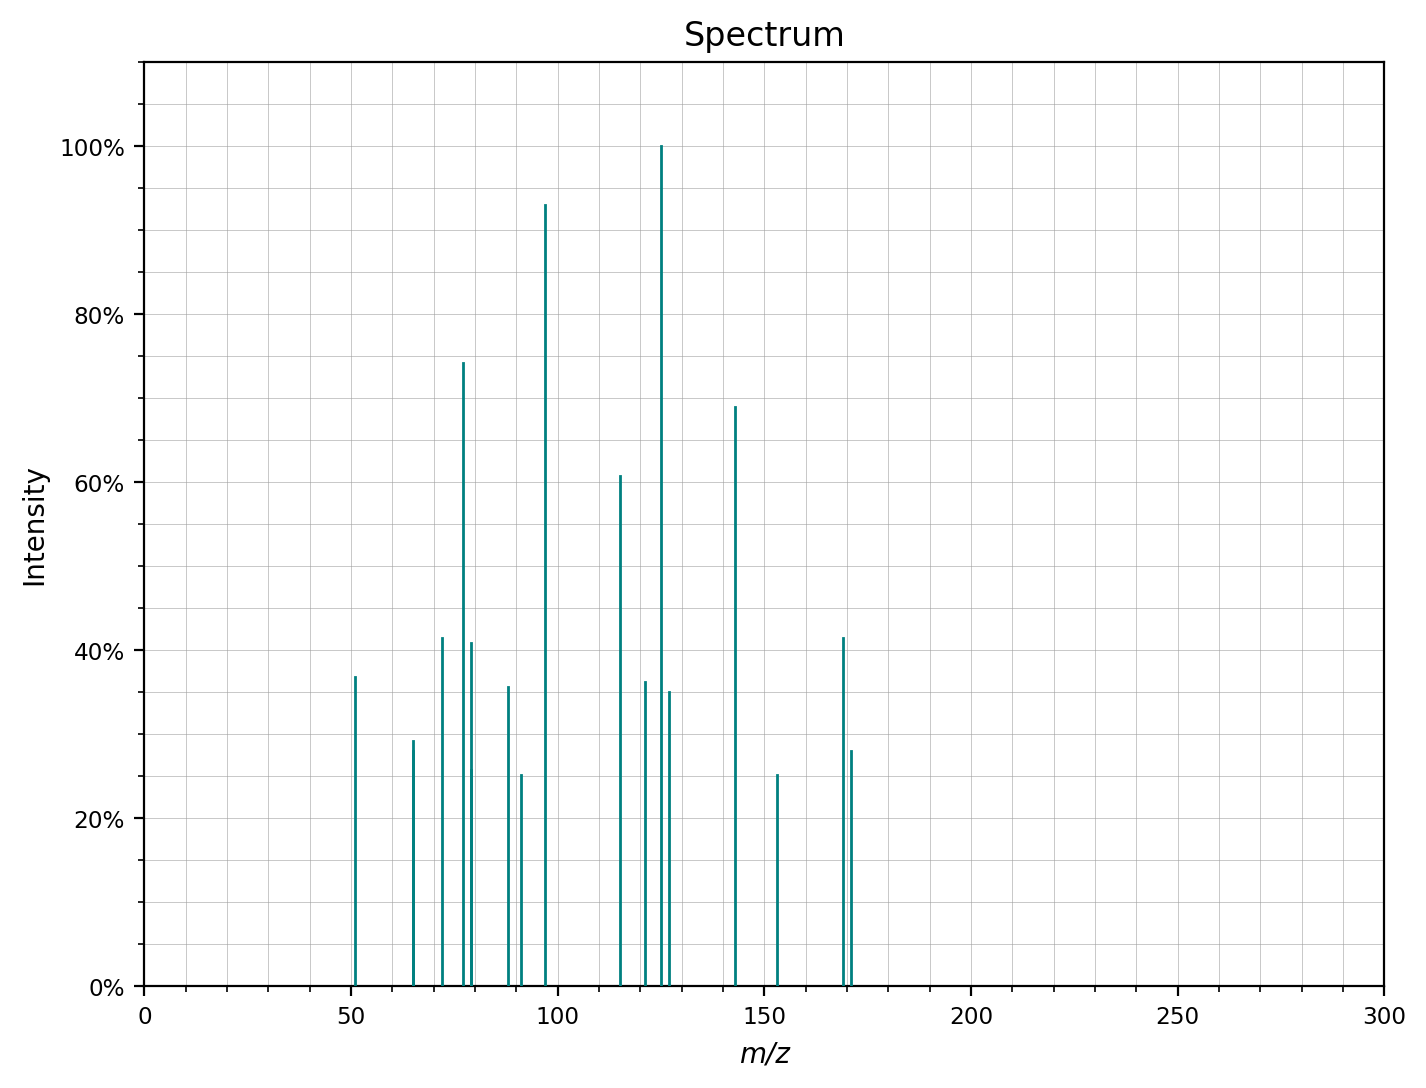

In [6]:
motifs_spectra[1].plot()

In [9]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)


AttributeError: 'list' object has no attribute 'id2word'